#Sugarcane Leaf Disease Classification Using Deep Learning
#[Paper Link](https://link.springer.com/chapter/10.1007/978-3-031-45121-8_8)

# Created and Developed By: Eng Waleed

#[Data Link](https://www.kaggle.com/datasets/nirmalsankalana/sugarcane-leaf-disease-dataset/data)

##Note


> Given the high complexity of the models and the limited computational power available in Colab, we'll need to run one model at a time to ensure optimal performance and resource utilization.



### Connect To Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Efficientnet

In [2]:
!pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


### Import Libraries

In [3]:
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3, VGG16, Xception, DenseNet169, DenseNet201
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import RMSprop
from efficientnet.tfkeras import EfficientNetB0



### Define Utilities

In [4]:
def load_dataset(path_dataset, target_size=(224, 224)):
    dataset = []
    labels = []

    for label in os.listdir(path_dataset):
        class_path = os.path.join(path_dataset, label)
        if os.path.isdir(class_path):
            images_counter = 0

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)

                if image is not None:
                    image = cv2.resize(image, target_size)
                    dataset.append(image)
                    labels.append(label)


                else:
                    print(f"Error loading image: {image_path}")

    return np.array(dataset), np.array(labels)

In [5]:
def show_samples(dataset, labels, classes, num_samples):
    plt.figure(figsize=(12, 6))

    for i, class_name in enumerate(classes[:num_samples]):  # Show only the first num_samples classes
        indices_class = np.where(labels == class_name)[0]
        sample_index = random.choice(indices_class)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(dataset[sample_index], cv2.COLOR_BGR2RGB))
        plt.title(f'{class_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [6]:
def preprocess_image(image):
    resized_image = cv2.resize(image, (224, 224))

    #Normalize values between 0 and 1
    normalized_image = resized_image / 255.0
    return normalized_image

### Load the dataset

In [7]:
dataset_path = "/content/drive/MyDrive/Datasets/Sugarcane Leaf Disease Dataset"
dataset, labels = load_dataset(dataset_path)

### Some dataset visualizations

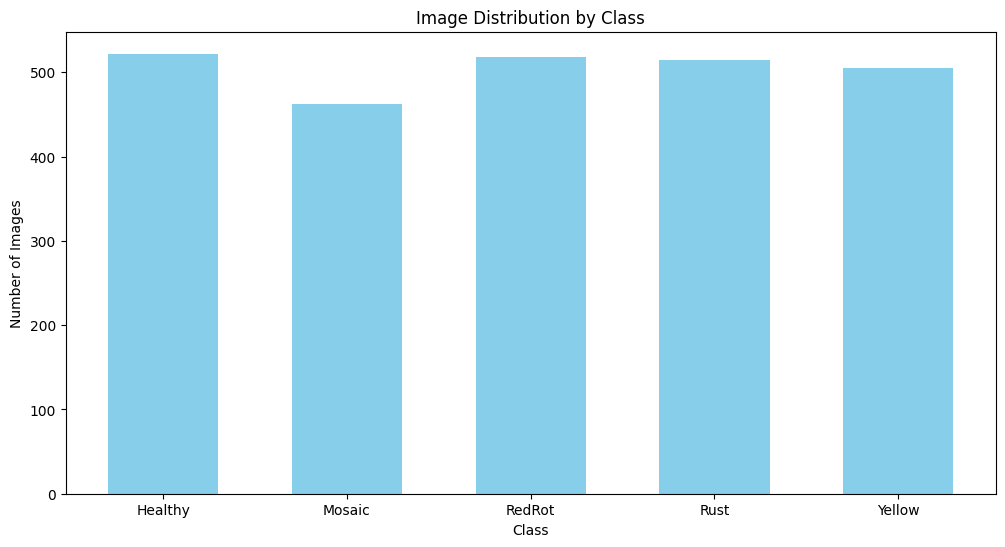

In [8]:
unique_labels, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(unique_labels, counts))

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(class_counts.keys(), class_counts.values(), color='skyblue', width=0.6)

ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution by Class')

plt.show()

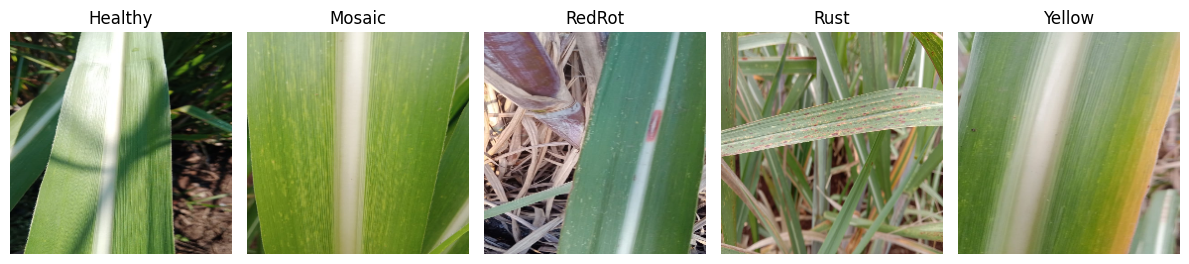

In [9]:
unique_classes = np.unique(labels)
show_samples(dataset, labels, unique_classes, num_samples=5)

### Split Data To Train and Test

In [10]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(dataset, encoded_labels, test_size=0.3
                                                    , random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
dataset = 0
labels = 0
encoded_labels = 0

Shape of X_train: (1764, 224, 224, 3)
Shape of X_test: (757, 224, 224, 3)
Shape of y_train: (1764,)
Shape of y_test: (757,)


### Preprocess The Dataset

In [11]:
X_train = np.array([preprocess_image(image) for image in X_train])
X_test = np.array([preprocess_image(image) for image in X_test])

### Make Experments Directories

In [12]:
os.makedirs("/content/drive/MyDrive/experments", exist_ok=True)
os.makedirs("/content/drive/MyDrive/experments/Sugarcane Leaf Disease Models", exist_ok=True)

### Hyper Parameters For Models

In [14]:
input_shape = (224, 224, 3)
num_classes = len(np.unique(y_train))
weights = 'imagenet'
patience = 10
learning_rate = 0.0001
epochs=100
models_path = "/content/drive/MyDrive/experments/Sugarcane Leaf Disease Models"

## Try InceptionV3 model

In [ ]:
input_layer = Input(shape=input_shape)
inceptionV3_model = InceptionV3(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = inceptionV3_model(input_layer)

x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_inceptionV3 = models.Model(inputs=input_layer, outputs=output_layer)

modified_inceptionV3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_193              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_194              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_195              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,076,453 (84.21 MB)

 Trainable params: 22,041,573 (84.08 MB)

 Non-trainable params: 34,880 (136.25 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=0.0001)
modified_inceptionV3.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modified_inceptionV3.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_inceptionV3.save(os.path.join(models_path, 'modified_inceptionV3_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2346 - loss: 2.9990 - val_accuracy: 0.2219 - val_loss: 3.0700
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 233ms/step - accuracy: 0.4083 - loss: 2.3969 - val_accuracy: 0.4861 - val_loss: 2.0360
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.5288 - loss: 2.0506 - val_accuracy: 0.6050 - val_loss: 1.8283
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.6108 - loss: 1.8352 - val_accuracy: 0.7041 - val_loss: 1.6096
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 260ms/step - accuracy: 0.6920 - loss: 1.6056 - val_accuracy: 0.7649 - val_loss: 1.4834
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 246ms/step - accuracy: 0.7617 - loss: 1.4500 - val_accuracy: 0.7609 - val_loss: 1.4690
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.8335 - loss: 1.2596 - val_accuracy: 0.8071 - val_loss: 1.3617
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.8756 - loss: 1.1782 - va

### Plot training and validation loss


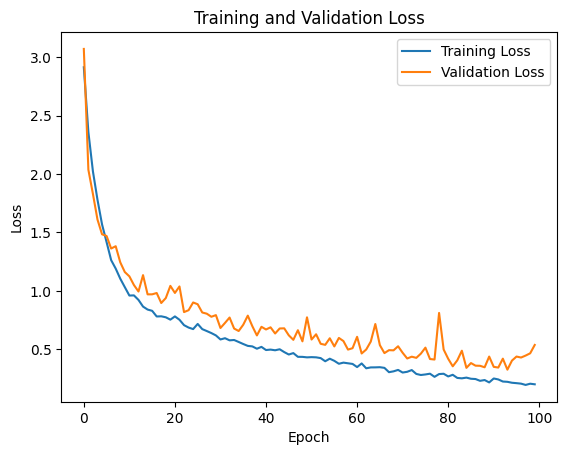

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


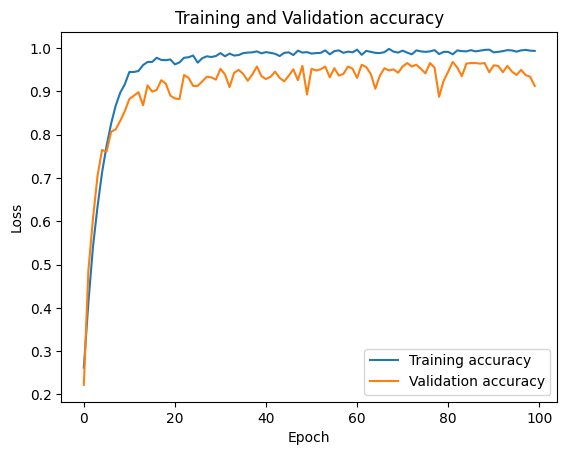

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 351ms/step


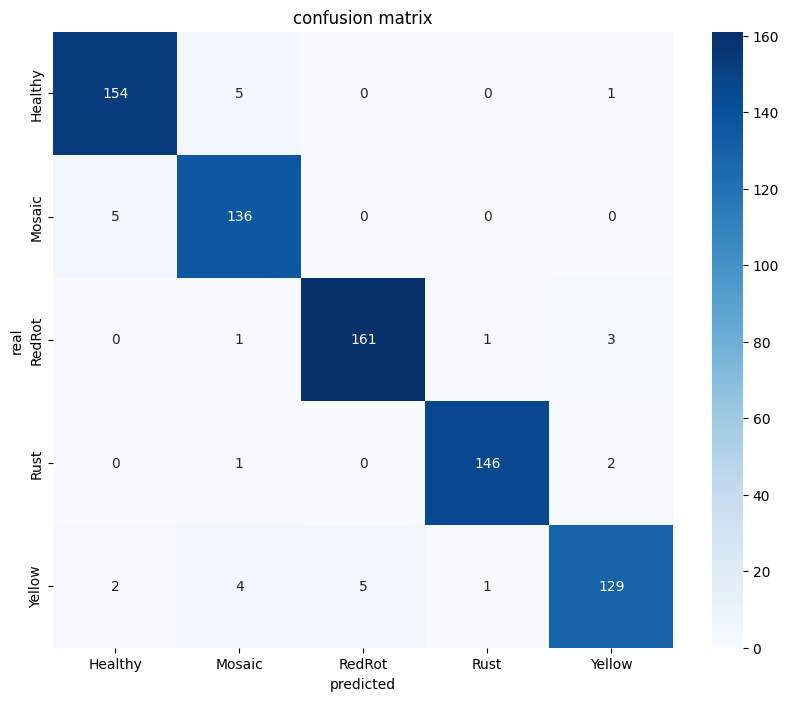

              precision    recall  f1-score   support

     Healthy     0.9565    0.9625    0.9595       160
      Mosaic     0.9252    0.9645    0.9444       141
      RedRot     0.9699    0.9699    0.9699       166
        Rust     0.9865    0.9799    0.9832       149
      Yellow     0.9556    0.9149    0.9348       141

    accuracy                         0.9590       757
   macro avg     0.9587    0.9583    0.9584       757
weighted avg     0.9593    0.9590    0.9590       757



In [ ]:
y_pred = modified_inceptionV3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_inceptionV3 = 0

### One of the ideal models for this task would be one that strikes a balance between complexity and efficiency, ensuring it captures the intricacies of the data while remaining computationally feasible.

## Try LeNet Model

In [ ]:
def LeNet(input_shape=(32, 32, 1)):
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
    ])
    return model

In [ ]:
leNet = LeNet(input_shape=input_shape)
leNet.add(Dense(units=num_classes, activation='softmax'))
leNet.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)                   │ (None, 220, 220, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 106, 106, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 44944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │       5,393,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,406,861 (20.63 MB)

 Trainable params: 5,406,861 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=0.0001)
leNet.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = leNet.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
leNet.save(os.path.join(models_path, 'leNet_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.2405 - loss: 1.5775 - val_accuracy: 0.2444 - val_loss: 1.5567
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4450 - loss: 1.3480 - val_accuracy: 0.4412 - val_loss: 1.2769
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5288 - loss: 1.1515 - val_accuracy: 0.4980 - val_loss: 1.1651
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6086 - loss: 1.0270 - val_accuracy: 0.4518 - val_loss: 1.2951
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6215 - loss: 0.9951 - val_accuracy: 0.5007 - val_loss: 1.1670
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6587 - loss: 0.9045 - val_accuracy: 0.2602 - val_loss: 1.9072
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6921 - loss: 0.8976 - val_accuracy: 0.5839 - val_loss: 1.0993
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7311 - loss: 0.7931 - val_accuracy: 

### Plot training and validation loss


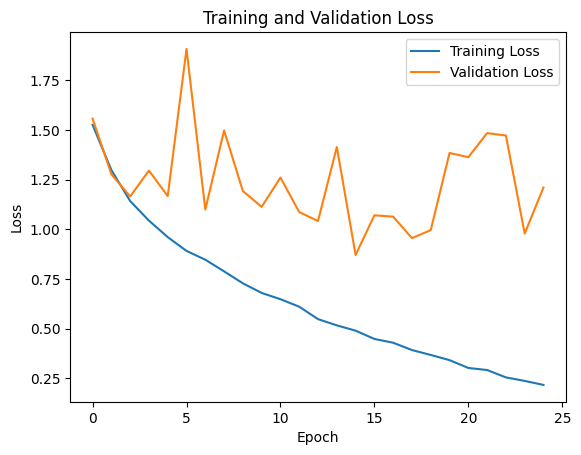

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


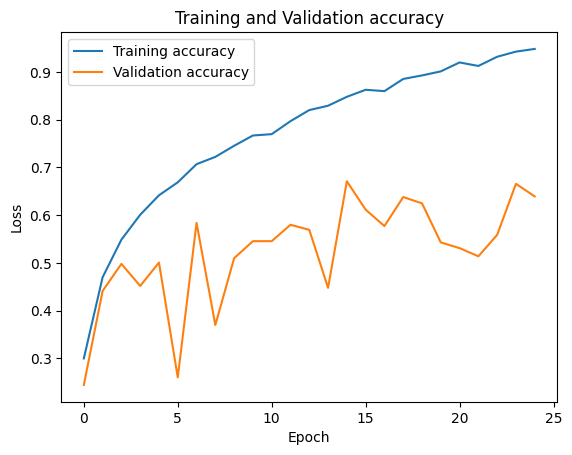

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


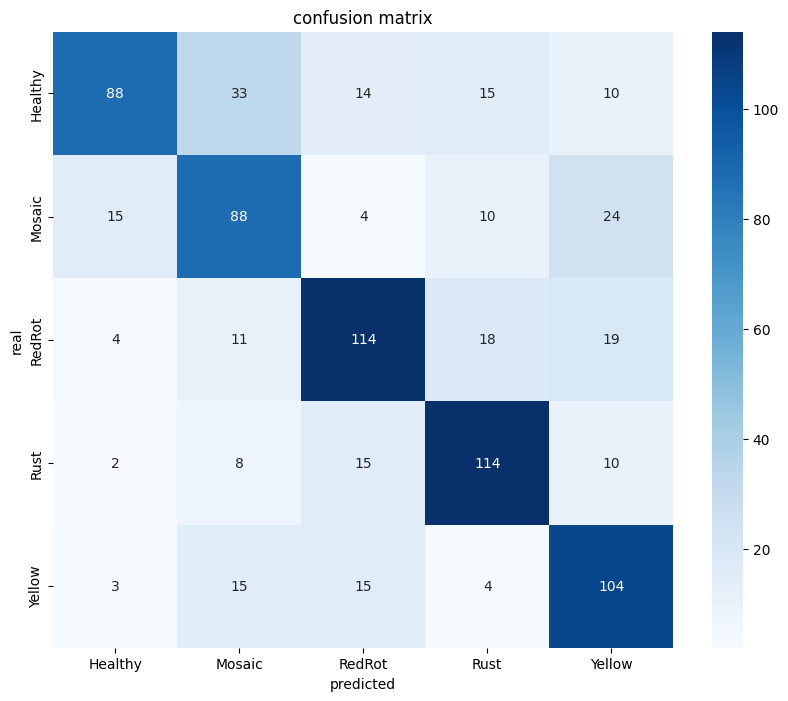

              precision    recall  f1-score   support

     Healthy     0.7857    0.5500    0.6471       160
      Mosaic     0.5677    0.6241    0.5946       141
      RedRot     0.7037    0.6867    0.6951       166
        Rust     0.7081    0.7651    0.7355       149
      Yellow     0.6228    0.7376    0.6753       141

    accuracy                         0.6711       757
   macro avg     0.6776    0.6727    0.6695       757
weighted avg     0.6815    0.6711    0.6705       757



In [ ]:
y_pred = leNet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
leNet = 0

### I suspect the low accuracy is due to training the model from scratch without utilizing transfer learning techniques.

## Try VGG16 model

In [ ]:
input_layer = Input(shape=input_shape)
vgg16_model = VGG16(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = vgg16_model(input_layer)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_vgg16 = models.Model(inputs=input_layer, outputs=output_layer)
modified_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,731,397 (56.20 MB)

 Trainable params: 14,731,333 (56.20 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=0.0001)
modified_vgg16.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modified_vgg16.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_vgg16.save(os.path.join(models_path, 'modified_vgg16_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3631 - loss: 1.6705 - val_accuracy: 0.2563 - val_loss: 2.4635
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 555ms/step - accuracy: 0.5962 - loss: 1.1738 - val_accuracy: 0.3369 - val_loss: 1.8601
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 547ms/step - accuracy: 0.7655 - loss: 0.7484 - val_accuracy: 0.4214 - val_loss: 2.7734
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 581ms/step - accuracy: 0.8422 - loss: 0.5790 - val_accuracy: 0.5429 - val_loss: 1.4083
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 600ms/step - accuracy: 0.8843 - loss: 0.4773 - val_accuracy: 0.4399 - val_loss: 2.0069
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 581ms/step - accuracy: 0.9050 - loss: 0.4136 - val_accuracy: 0.8758 - val_loss: 0.4242
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 588ms/step - accuracy: 0.9326 - loss: 0.3650 - val_accuracy: 0.8349 - val_loss: 0.6726
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 547ms/step - accuracy: 0.9326 - loss: 0.3369 - va

### Plot training and validation loss


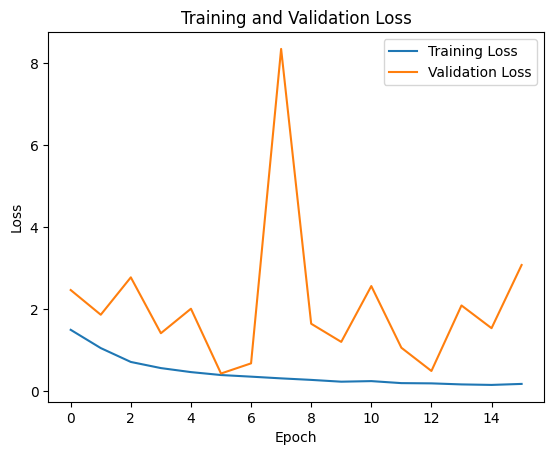

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


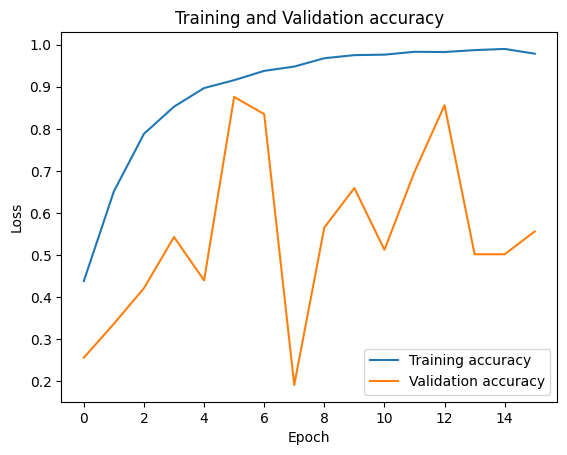

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step


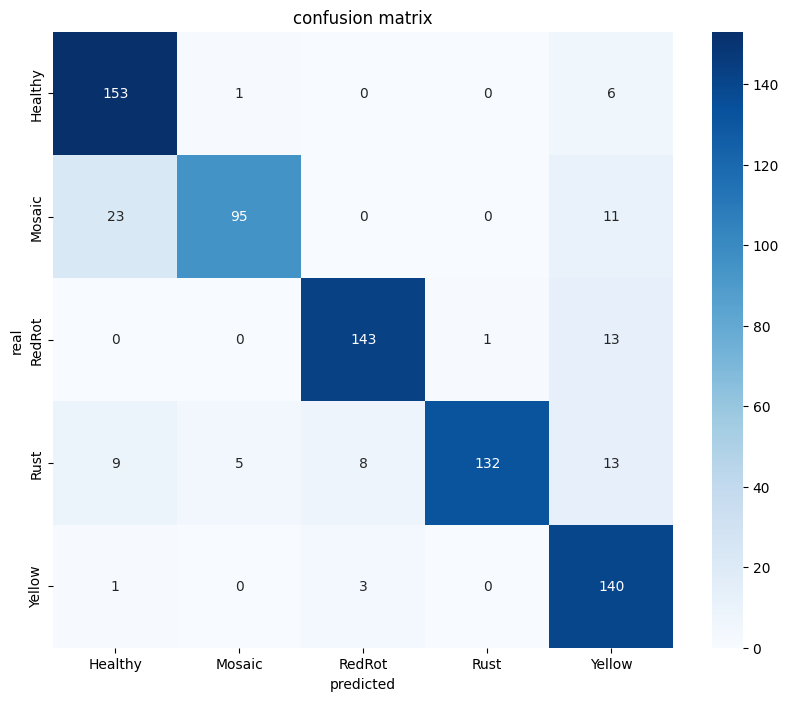

              precision    recall  f1-score   support

     Healthy     0.8226    0.9563    0.8844       160
      Mosaic     0.9406    0.7364    0.8261       129
      RedRot     0.9286    0.9108    0.9196       157
        Rust     0.9925    0.7904    0.8800       167
      Yellow     0.7650    0.9722    0.8563       144

    accuracy                         0.8758       757
   macro avg     0.8899    0.8732    0.8733       757
weighted avg     0.8912    0.8758    0.8754       757



In [ ]:
y_pred = modified_vgg16.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_vgg16 = 0

### It appears that the training process lacks stability, suggesting the need to adjust the learning rate downwards. By reducing the learning rate and retraining the model, we aim to improve training stability and convergence.

## Try EfficientNet model

In [ ]:
input_layer = Input(shape=input_shape)

efficientnet_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = efficientnet_model(input_layer)

x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_efficientnetb0 = models.Model(inputs=input_layer, outputs=output_layer)
modified_efficientnetb0.summary()


16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnet-b0 (Functional)         │ (None, 1280)                │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,224,929 (16.12 MB)

 Trainable params: 4,182,465 (15.95 MB)

 Non-trainable params: 42,464 (165.88 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=0.0001)
modified_efficientnetb0.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modified_efficientnetb0.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_efficientnetb0.save(os.path.join(models_path, 'modified_efficientnetb0_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.2150 - loss: 2.9651 - val_accuracy: 0.2417 - val_loss: 2.3125
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 152ms/step - accuracy: 0.2505 - loss: 2.6929 - val_accuracy: 0.2431 - val_loss: 2.3408
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.3411 - loss: 2.4216 - val_accuracy: 0.2919 - val_loss: 2.3183
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.3882 - loss: 2.2452 - val_accuracy: 0.3501 - val_loss: 2.1701
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.4216 - loss: 2.1524 - val_accuracy: 0.4188 - val_loss: 2.0318
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.5016 - loss: 1.9877 - val_accuracy: 0.4993 - val_loss: 1.8891
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.4956 - loss: 1.9382 - val_accuracy: 0.5588 - val_loss: 1.7753
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.5416 - loss: 1.8243 - val

### Plot training and validation loss


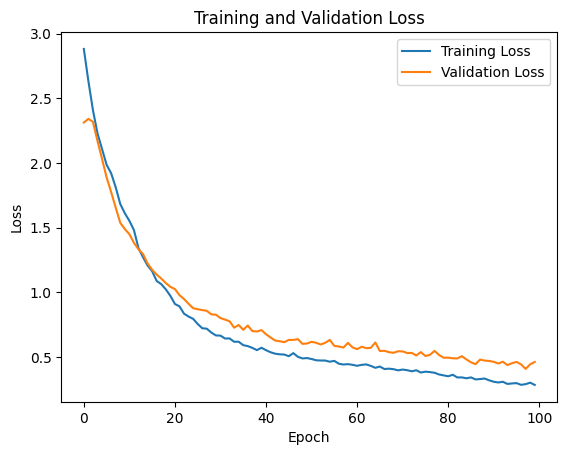

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


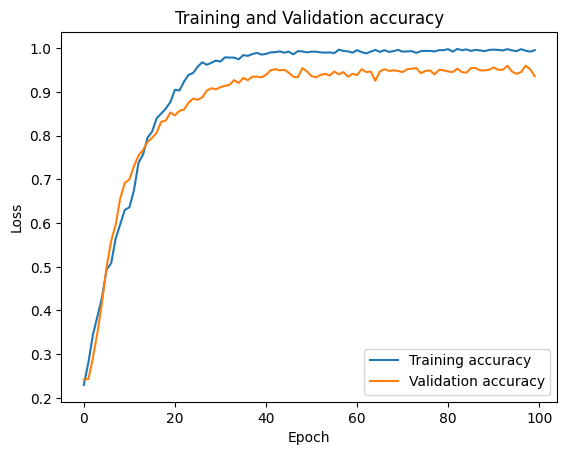

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step


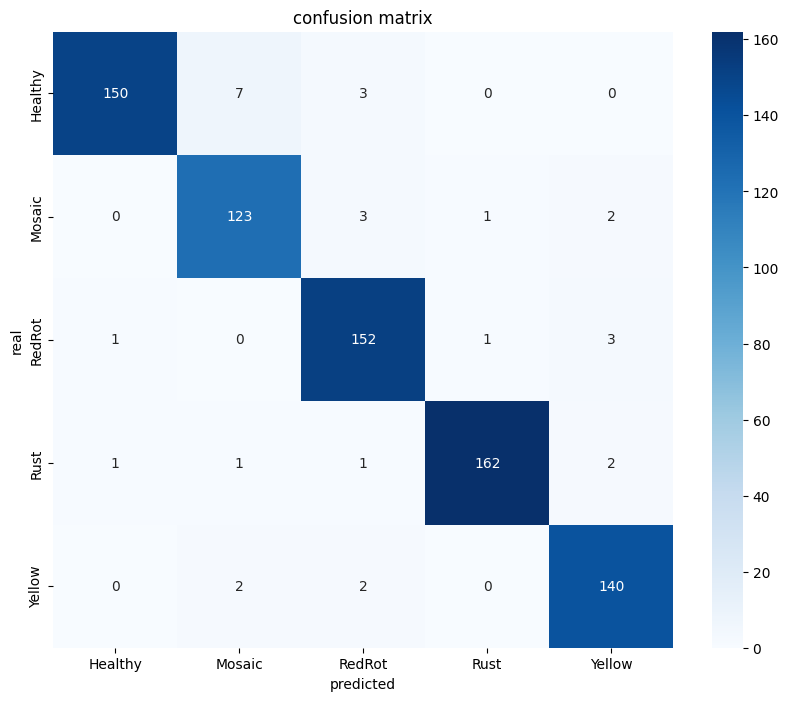

              precision    recall  f1-score   support

     Healthy     0.9868    0.9375    0.9615       160
      Mosaic     0.9248    0.9535    0.9389       129
      RedRot     0.9441    0.9682    0.9560       157
        Rust     0.9878    0.9701    0.9789       167
      Yellow     0.9524    0.9722    0.9622       144

    accuracy                         0.9604       757
   macro avg     0.9592    0.9603    0.9595       757
weighted avg     0.9611    0.9604    0.9605       757



In [ ]:
y_pred = modified_efficientnetb0.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_efficientnetb0 = 0

### One of the ideal models for this task would be one that strikes a balance between complexity and efficiency, ensuring it captures the intricacies of the data while remaining computationally feasible.

## Try Xception model

In [ ]:
input_layer = Input(shape=input_shape)

xception_model = Xception(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = xception_model(input_layer)

x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_xception = models.Model(inputs=input_layer, outputs=output_layer)
modified_xception.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,135,149 (80.62 MB)

 Trainable params: 21,080,173 (80.41 MB)

 Non-trainable params: 54,976 (214.75 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=learning_rate)
modified_xception.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modified_xception.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_xception.save(os.path.join(models_path, 'modified_xception_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.2454 - loss: 2.9202 - val_accuracy: 0.2483 - val_loss: 2.3745
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 72s 531ms/step - accuracy: 0.3563 - loss: 2.4392 - val_accuracy: 0.5112 - val_loss: 2.0536
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 504ms/step - accuracy: 0.5040 - loss: 2.1094 - val_accuracy: 0.5680 - val_loss: 1.8788
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 516ms/step - accuracy: 0.5760 - loss: 1.8875 - val_accuracy: 0.7239 - val_loss: 1.5779
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 545ms/step - accuracy: 0.6475 - loss: 1.7309 - val_accuracy: 0.7688 - val_loss: 1.4013
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 515ms/step - accuracy: 0.7320 - loss: 1.5212 - val_accuracy: 0.8151 - val_loss: 1.3121
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 553ms/step - accuracy: 0.8066 - loss: 1.3532 - val_accuracy: 0.8653 - val_loss: 1.2236
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 506ms/step - accuracy: 0.8896 - loss: 1.1688 - va

### Plot training and validation loss


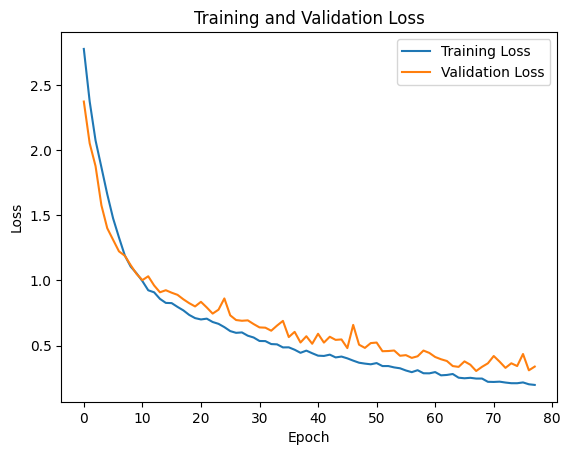

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


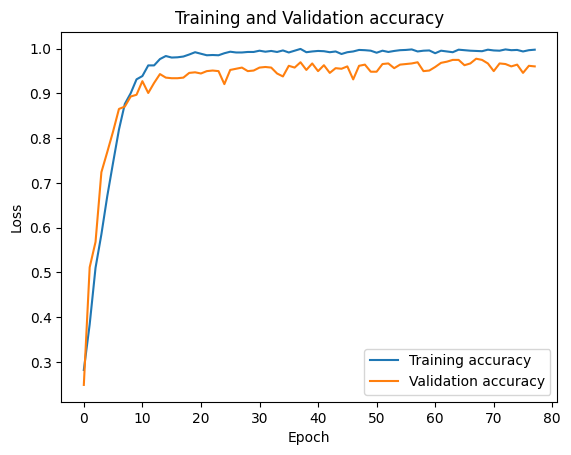

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step


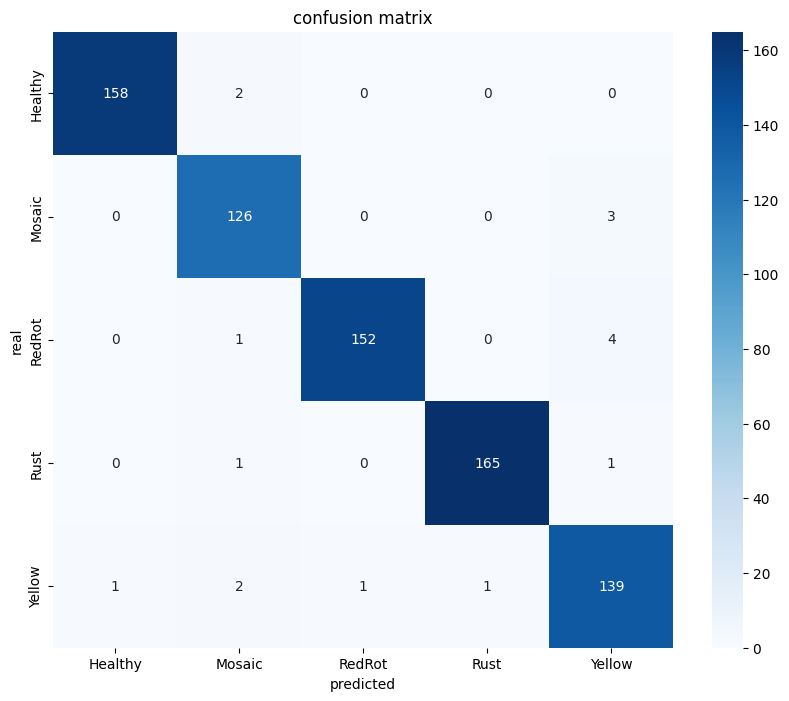

              precision    recall  f1-score   support

     Healthy     0.9937    0.9875    0.9906       160
      Mosaic     0.9545    0.9767    0.9655       129
      RedRot     0.9935    0.9682    0.9806       157
        Rust     0.9940    0.9880    0.9910       167
      Yellow     0.9456    0.9653    0.9553       144

    accuracy                         0.9775       757
   macro avg     0.9763    0.9771    0.9766       757
weighted avg     0.9779    0.9775    0.9776       757



In [ ]:
y_pred = modified_xception.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_xception = 0

### One of the ideal models for this task would be one that strikes a balance between complexity and efficiency, ensuring it captures the intricacies of the data while remaining computationally feasible.

## Try DenseNet169 Model

In [ ]:
input_layer = Input(shape=input_shape)

densenet_model = DenseNet169(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = densenet_model(input_layer)

x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_densenet169 = models.Model(inputs=input_layer, outputs=output_layer)
modified_densenet169.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet169 (Functional)             │ (None, 1664)                │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,867,397 (49.09 MB)

 Trainable params: 12,708,549 (48.48 MB)

 Non-trainable params: 158,848 (620.50 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=learning_rate)
modified_densenet169.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modified_densenet169.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_densenet169.save(os.path.join(models_path, 'modified_densenet169_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 488s 5s/step - accuracy: 0.2546 - loss: 2.8409 - val_accuracy: 0.3487 - val_loss: 2.3404
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.4511 - loss: 2.1567 - val_accuracy: 0.5443 - val_loss: 1.9021
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.5431 - loss: 1.9048 - val_accuracy: 0.6618 - val_loss: 1.5698
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 398ms/step - accuracy: 0.6397 - loss: 1.6090 - val_accuracy: 0.7107 - val_loss: 1.4143
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - accuracy: 0.7937 - loss: 1.2723 - val_accuracy: 0.7596 - val_loss: 1.3726
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 408ms/step - accuracy: 0.8427 - loss: 1.1283 - val_accuracy: 0.8745 - val_loss: 1.1254
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 398ms/step - accuracy: 0.8923 - loss: 1.0025 - val_accuracy: 0.8917 - val_loss: 0.9631
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.9125 - loss: 0.9047 - va

### Plot training and validation loss


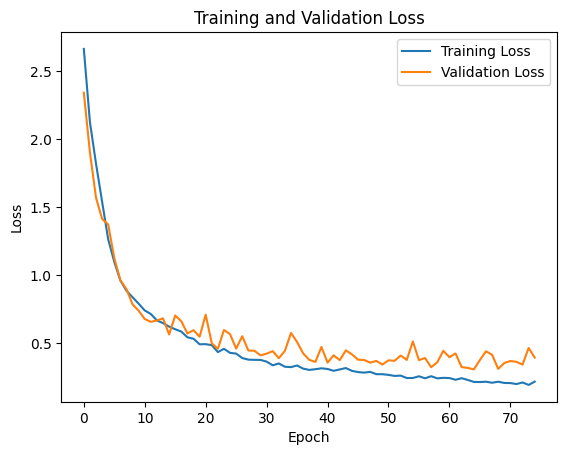

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


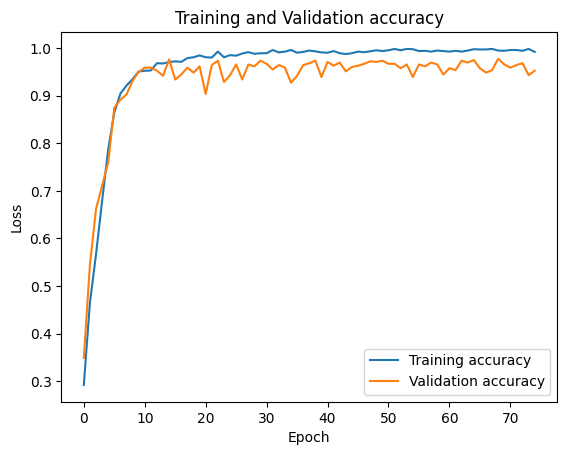

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 625ms/step


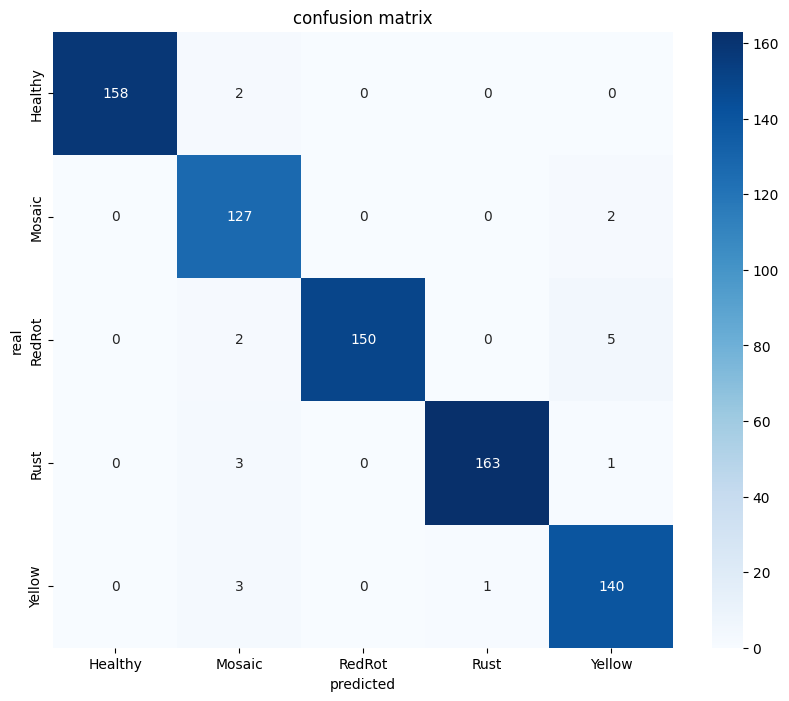

              precision    recall  f1-score   support

     Healthy     1.0000    0.9875    0.9937       160
      Mosaic     0.9270    0.9845    0.9549       129
      RedRot     1.0000    0.9554    0.9772       157
        Rust     0.9939    0.9760    0.9849       167
      Yellow     0.9459    0.9722    0.9589       144

    accuracy                         0.9749       757
   macro avg     0.9734    0.9751    0.9739       757
weighted avg     0.9759    0.9749    0.9751       757



In [ ]:
y_pred = modified_densenet169.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_densenet169 = 0

### One of the ideal models for this task would be one that strikes a balance between complexity and efficiency, ensuring it captures the intricacies of the data while remaining computationally feasible.

## Try DenseNet201 Model

In [15]:
input_layer = Input(shape=input_shape)

densenet_model = DenseNet201(input_shape=input_shape, include_top=False, weights=weights, pooling='max')
x = densenet_model(input_layer)

x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(units=num_classes, activation='softmax')(x)
modified_densenet201 = models.Model(inputs=input_layer, outputs=output_layer)
modified_densenet201.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet201 (Functional)             │ (None, 1920)                │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         245,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,579,269 (70.87 MB)

 Trainable params: 18,349,765 (70.00 MB)

 Non-trainable params: 229,504 (896.50 KB)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
custom_optimizer = RMSprop(learning_rate=learning_rate)
modified_densenet201.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = modified_densenet201.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Save the model
modified_densenet201.save(os.path.join(models_path, 'modified_densenet201_model.h5'))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 786s 8s/step - accuracy: 0.2794 - loss: 2.7822 - val_accuracy: 0.4531 - val_loss: 2.1118
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 493ms/step - accuracy: 0.4621 - loss: 2.0947 - val_accuracy: 0.5958 - val_loss: 1.8339
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 536ms/step - accuracy: 0.5730 - loss: 1.7951 - val_accuracy: 0.6948 - val_loss: 1.5272
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.6863 - loss: 1.5454 - val_accuracy: 0.7067 - val_loss: 1.4520
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 496ms/step - accuracy: 0.7309 - loss: 1.4464 - val_accuracy: 0.8336 - val_loss: 1.1497
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 535ms/step - accuracy: 0.8252 - loss: 1.1765 - val_accuracy: 0.8758 - val_loss: 1.0271
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 491ms/step - accuracy: 0.8842 - loss: 1.0437 - val_accuracy: 0.8719 - val_loss: 1.0023
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 496ms/step - accuracy: 0.9269 - loss: 0.9391 - va

### Plot training and validation loss


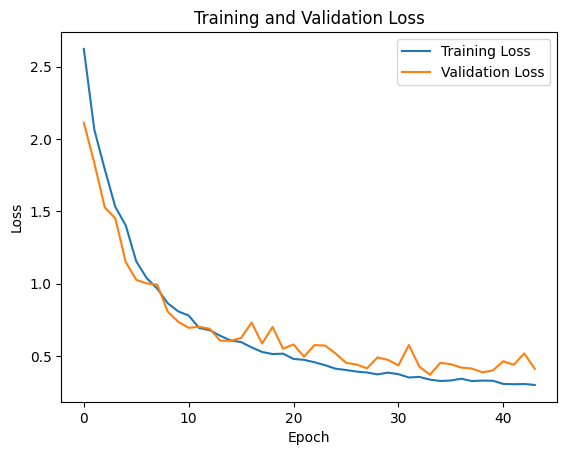

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot training and validation accuracy


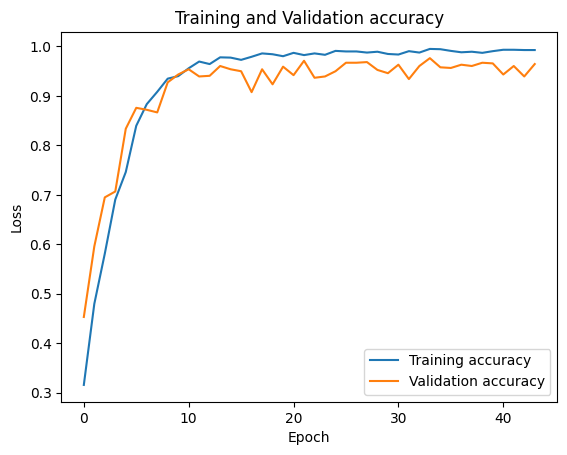

In [19]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test The Model & Plot Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 750ms/step


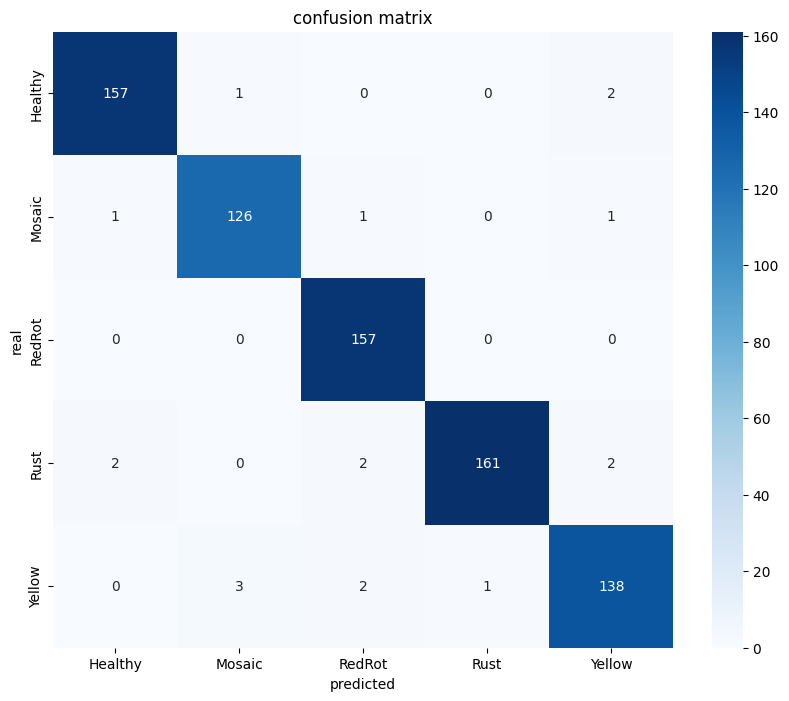

              precision    recall  f1-score   support

     Healthy     0.9812    0.9812    0.9812       160
      Mosaic     0.9692    0.9767    0.9730       129
      RedRot     0.9691    1.0000    0.9843       157
        Rust     0.9938    0.9641    0.9787       167
      Yellow     0.9650    0.9583    0.9617       144

    accuracy                         0.9762       757
   macro avg     0.9757    0.9761    0.9758       757
weighted avg     0.9764    0.9762    0.9762       757



In [20]:
y_pred = modified_densenet201.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))
modified_densenet201 = 0

### One of the ideal models for this task would be one that strikes a balance between complexity and efficiency, ensuring it captures the intricacies of the data while remaining computationally feasible.